<a href="https://colab.research.google.com/github/m-volnykh/BasisOfMachineLearning/blob/main/PR01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №1: Wine Quality
Выполнила Вольных М. В., 3 курс ИВТ, 2-1

##Подготовка данных

### Загрузка данных

In [267]:
%%capture
!git clone https://github.com/m-volnykh/BasisOfMachineLearning

In [268]:
import pandas as pd

data = pd.read_csv('/content/BasisOfMachineLearning/Pract1/WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Анализ данных

In [269]:
import numpy as np
import seaborn as sns
import matplotlib as pyplot

In [270]:
data.shape

(1143, 13)

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Из таблицы понятно, что все данные являются числовыми.

По количеству Non-Null ыидно, что в данных отстутствуют пропуски.

Дополнительная проверка:

In [272]:
data.isnull().sum().sum()

np.int64(0)

Статистическое описание данных:

In [273]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Анализ распределения целевой переменной:

<Axes: xlabel='quality', ylabel='count'>

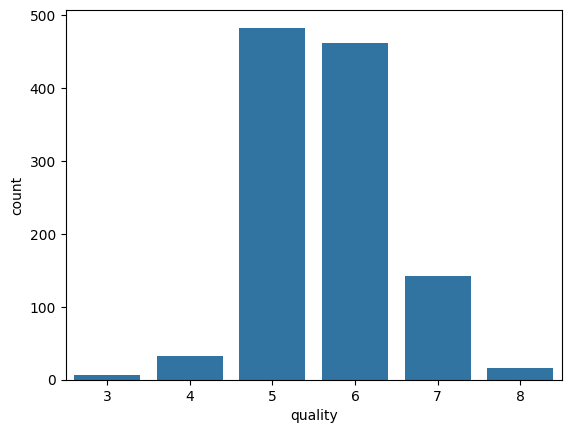

In [274]:
sns.countplot(data, x='quality')

Корреляционный анализ:

<Axes: >

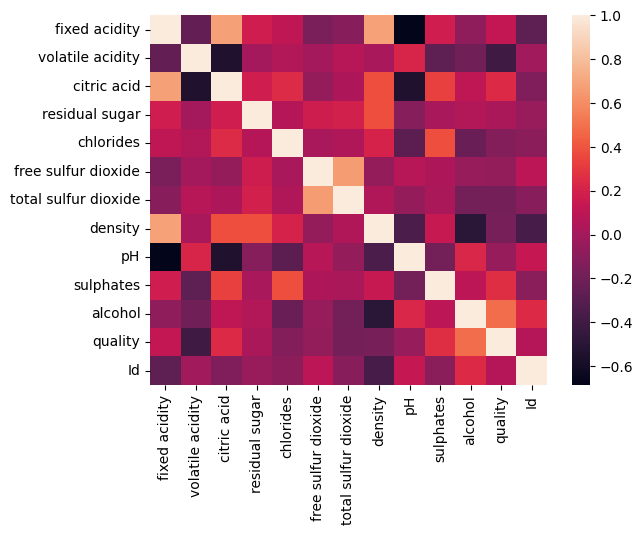

In [275]:
sns.heatmap(data.corr())

### Разделение выборок

Стратифицированное разделение на обучающую (70%), валидационную
(15%) и тестовую (15%) выборки:

In [276]:
from sklearn.model_selection import train_test_split

#X - матрица наблюдений, y - столбец правильных ответов
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']

#Создаем тренировочную
X_train, X_valid, y_train, y_valid = train_test_split(
    X,y,
    test_size=0.3,
    random_state=40,
    stratify = y
)

#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))

Train shape: (800, 11)
Valid shape: (343, 11)


### Работа с выбросами

 Визуализация
распределений признаков с помощью boxplot:

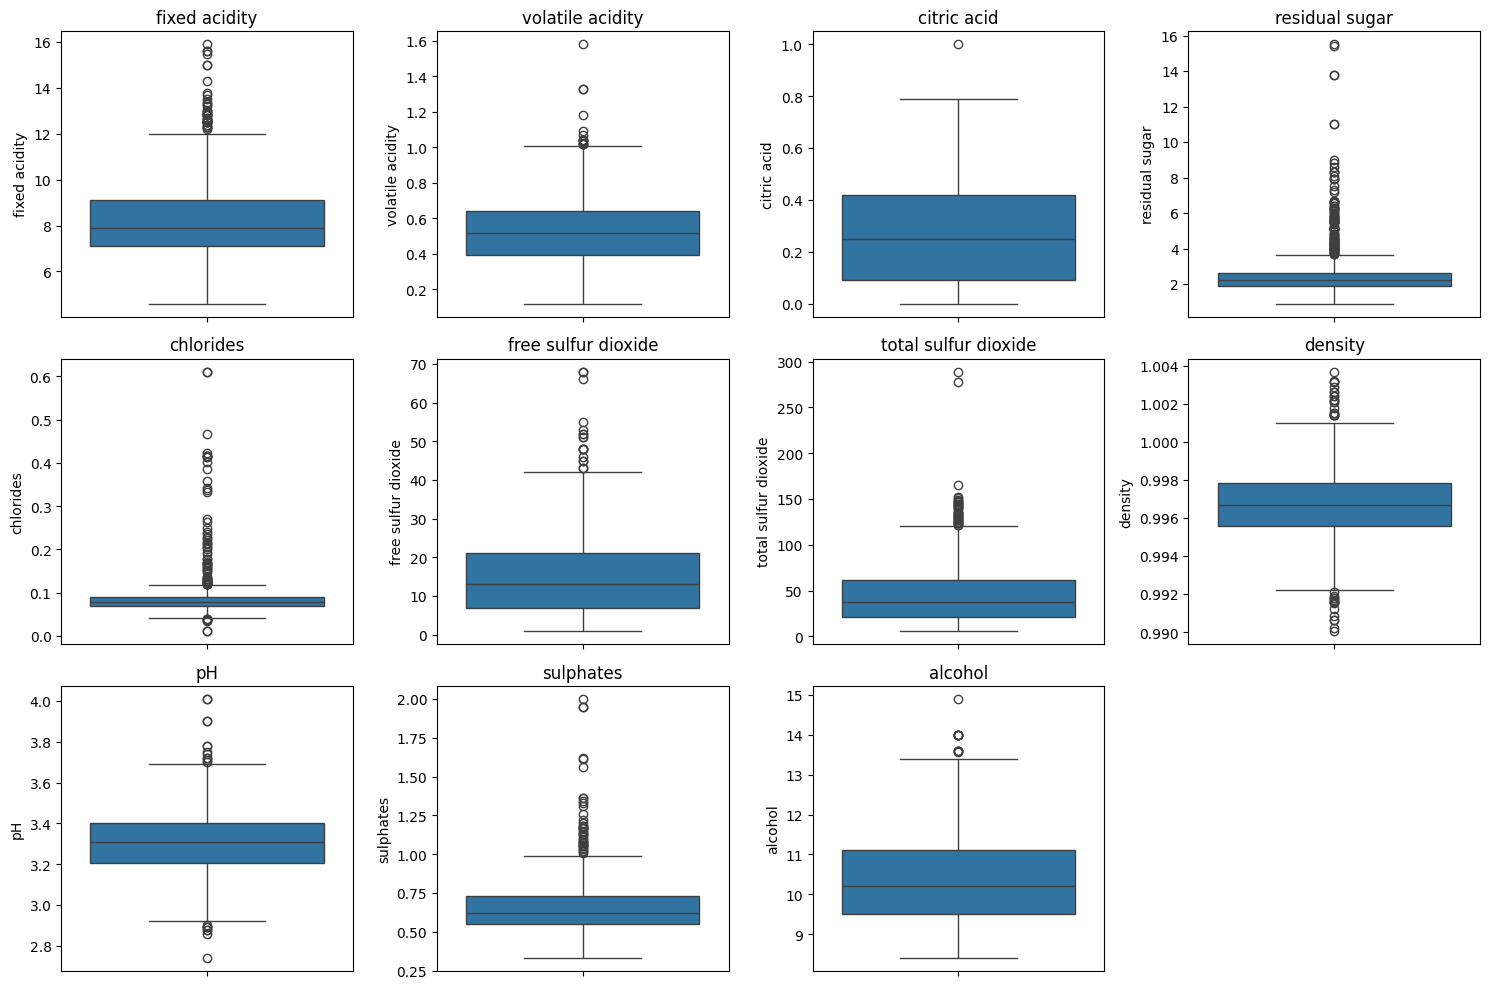

In [277]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(X_train):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Выявление и удаление экстремальных выбросов методом межквартильного размаха (IQR):

In [278]:
train_filtered = pd.concat([X_train, y_train], axis=1, join='outer')

for col in X_train:
    Q1 = train_filtered[col].quantile(0.25)
    Q3 = train_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    train_filtered = train_filtered[(train_filtered[col] >= Q1 - 3 * IQR) & (train_filtered[col] <= Q3 + 3 * IQR)].copy()

#train_filtered.info()

X_train_filtred = train_filtered.drop('quality', axis=1)
y_train_filtered = train_filtered['quality']

print(f"Размер данных до удаления выбросов: {X_train.shape}")
print(f"Размер данных после удаления выбросов: {X_train_filtred.shape}")

Размер данных до удаления выбросов: (800, 11)
Размер данных после удаления выбросов: (716, 11)


### Стандартизация признаков

In [279]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_valid_scaled = scaler.fit_transform(X_valid)

## Обучение моделей и нахождение наиболее к удачной

### Модель Логистической регрессии

Выбор оптимальных гиперпараметров для модели:

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'sag', 'saga']
}

random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=5000),
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
28 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=LogisticRegression(max_iter=5000), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'sag', 'saga']},
                   random_state=42)

In [281]:
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший результат кросс-валидации: {random_search.best_score_:.4f}")

Лучшие параметры: {'solver': 'sag', 'penalty': 'l2', 'C': 0.1}
Лучший результат кросс-валидации: 0.6075


Создание и обучение модели в соответствии с подобранными гиперпараметрами:

In [282]:
log_reg = random_search.best_estimator_

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=5000, solver='sag')

Прогнозирование на тестовой выборке и оценка качества модели:

In [283]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

y_pred = log_reg.predict(X_valid_scaled)
y_pred_proba = log_reg.predict_proba(X_valid_scaled)

# Оценка качества модели
accuracy_log_reg = accuracy_score(y_valid, y_pred)
print(f"Точность модели: {accuracy_log_reg:.2f}")

# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации:")
print(classification_report(y_valid, y_pred))

# Матрица ошибок
cm_log_reg = confusion_matrix(y_valid, y_pred)
print("\nМатрица ошибок:")
print(cm_log_reg)

# ROC-кривая и значение AUC
roc_auc = roc_auc_score(y_valid, y_pred_proba, multi_class='ovr')
print(f"\nROC AUC: {roc_auc:.2f}")

Точность модели: 0.61

Отчёт о классификации:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.68      0.79      0.73       145
           6       0.56      0.62      0.58       138
           7       0.48      0.26      0.33        43
           8       0.00      0.00      0.00         5

    accuracy                           0.61       343
   macro avg       0.29      0.28      0.27       343
weighted avg       0.57      0.61      0.59       343


Матрица ошибок:
[[  0   0   2   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 114  29   2   0]
 [  0   0  44  85   9   0]
 [  0   0   0  32  11   0]
 [  0   0   0   4   1   0]]

ROC AUC: 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Определение важности коэффициентов:

Text(0.5, 1.0, 'Коэффициенты Логистической Регрессии')

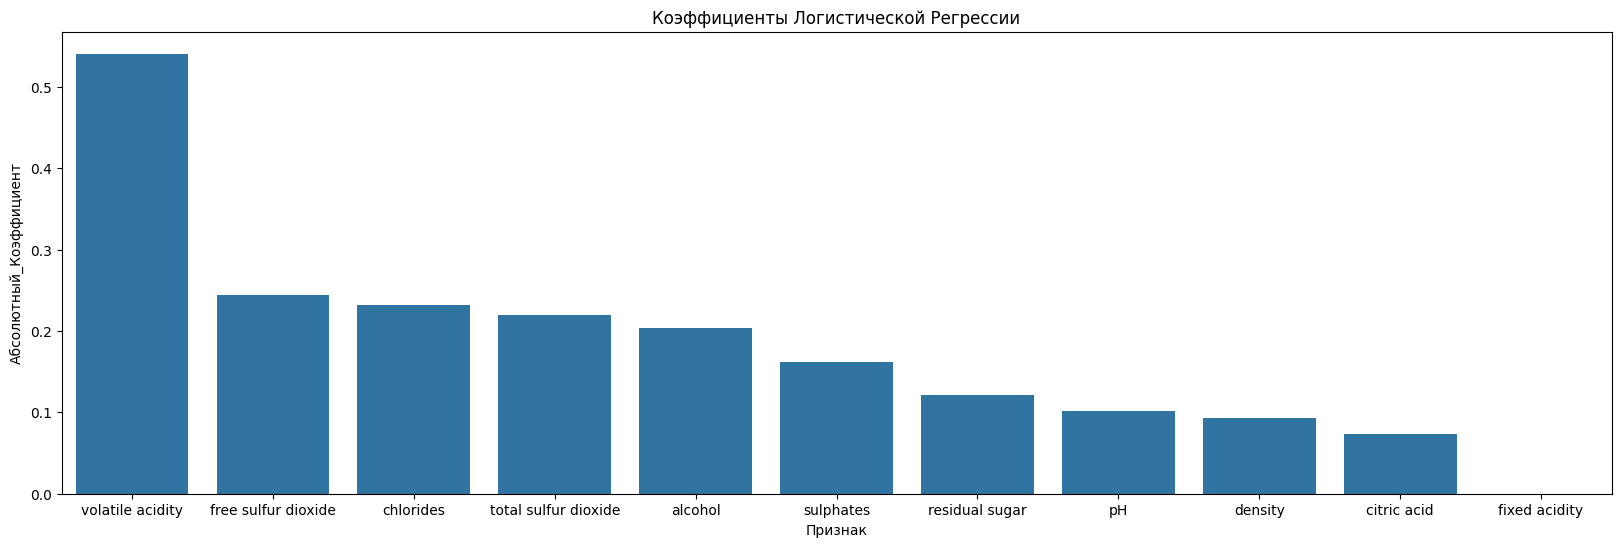

In [284]:
coefficients_log_reg = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': log_reg.coef_[0]
})
coefficients_log_reg['Абсолютный_Коэффициент'] = abs(coefficients_log_reg['Коэффициент'])
coefficients_log_reg = coefficients_log_reg.sort_values(by='Абсолютный_Коэффициент', ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x='Признак', y='Абсолютный_Коэффициент', data=coefficients_log_reg)
plt.title('Коэффициенты Логистической Регрессии')

Проверка модели кросс-валидацией:

In [285]:
from sklearn.model_selection import cross_val_score

cv_scores_logreg = cross_val_score(
    log_reg,
    X_valid_scaled,
    y_valid,
    cv=cv)

print(f'Средний результат кросс-валидации: {cv_scores_logreg.mean():.2f}')

Средний результат кросс-валидации: 0.63


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


По результатам проверки видно, что логистическая модель хорошо различает классы (AUC-ROC = 0.78), но вероятность верного предсказания сводится к 60%, что достаточно мало.


### Модель Random Forest

Выбор оптимальных гиперпараметров:

In [286]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [3, 5, 10]
}

grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат кросс-валидации: {grid_search.best_score_:.3f}")

Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100}
Лучший результат кросс-валидации: 0.644


Создание и обучение модели с выбранными гиперпараметрами:

In [287]:
rf = grid_search.best_estimator_

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=3, random_state=42)

Проверка на тестовых данных

In [288]:
y_pred = rf.predict(X_valid_scaled)

# Оценка качества модели
accuracy_rf = accuracy_score(y_valid, y_pred)
print(f"Точность модели: {accuracy_rf:.2f}")

# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации:")
print(classification_report(y_valid, y_pred))

# Матрица ошибок
cm_rf = confusion_matrix(y_valid, y_pred)
print("\nМатрица ошибок:")
print(cm_rf)

Точность модели: 0.63

Отчёт о классификации:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.67      0.71      0.69       145
           6       0.57      0.67      0.62       138
           7       0.71      0.47      0.56        43
           8       0.00      0.00      0.00         5

    accuracy                           0.63       343
   macro avg       0.33      0.31      0.31       343
weighted avg       0.61      0.63      0.61       343


Матрица ошибок:
[[  0   0   2   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 103  40   2   0]
 [  0   0  40  93   5   0]
 [  0   0   1  22  20   0]
 [  0   0   0   4   1   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Определение важности коэффициентов:

Text(0.5, 1.0, 'Коэффициенты Random Forest')

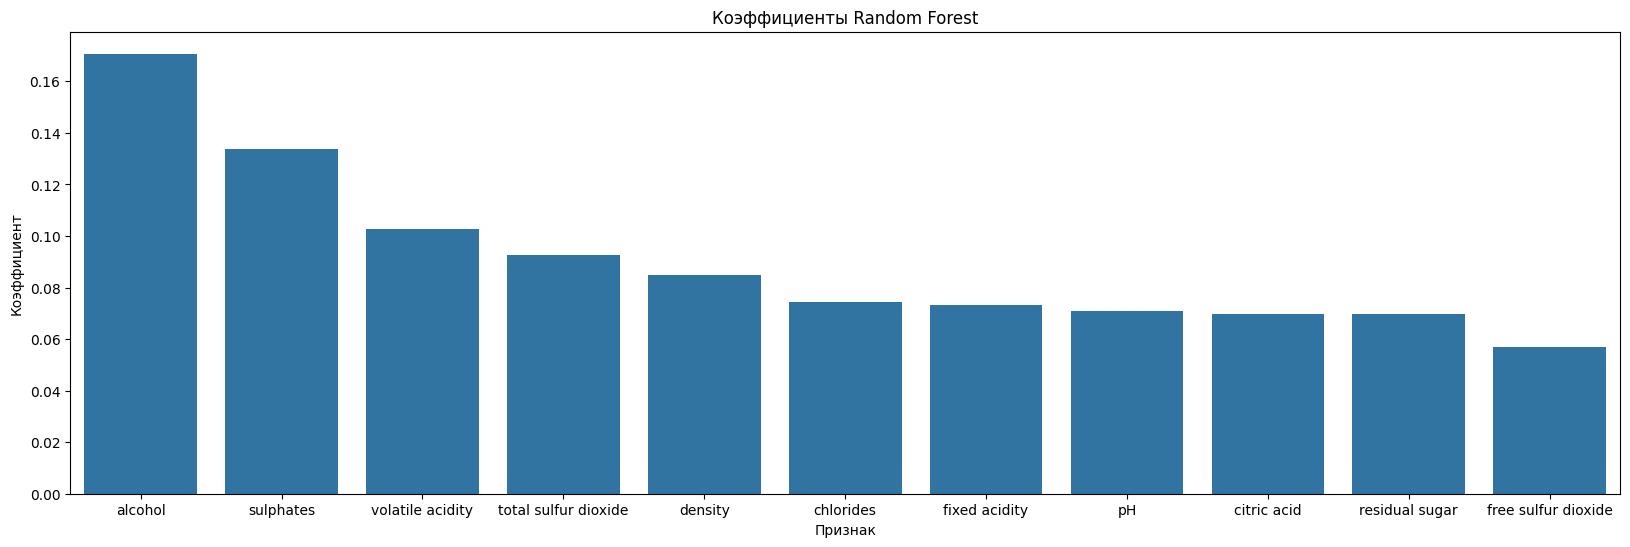

In [289]:
importances = rf.feature_importances_
feature_names = X_train.columns

sorted_importances = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': rf.feature_importances_
}).sort_values(by='Коэффициент', ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x='Признак', y='Коэффициент', data=sorted_importances)
plt.title('Коэффициенты Random Forest')

Проверка кросс-валидацией:

In [290]:
cv_scores_rf = cross_val_score(
    rf,
    X_valid_scaled,
    y_valid,
    cv=cv)

print(f'Средний результат кросс-валидации: {cv_scores_rf.mean():.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


Средний результат кросс-валидации: 0.60


### Сравнение двух моделей и выбор лучшей

In [291]:
print(f"Точность модели Логистической регрессии: {accuracy_log_reg:.2f}")
print(f"Точность модели Random Forest: {accuracy_rf:.2f}")

print(f"\nМатрица ошибок Логистической регрессии:\n{cm_log_reg}")
print(f"\nМатрица ошибок Random Forest:\n{cm_rf}")

print(f"\nТоп-3 признаков Логистической регрессии:\n{coefficients_log_reg.head(3)['Признак']}")
print(f"\nТоп-3 признаков Random Forest:\n{sorted_importances.head(3)['Признак']}")

Точность модели Логистической регрессии: 0.61
Точность модели Random Forest: 0.63

Матрица ошибок Логистической регрессии:
[[  0   0   2   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 114  29   2   0]
 [  0   0  44  85   9   0]
 [  0   0   0  32  11   0]
 [  0   0   0   4   1   0]]

Матрица ошибок Random Forest:
[[  0   0   2   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 103  40   2   0]
 [  0   0  40  93   5   0]
 [  0   0   1  22  20   0]
 [  0   0   0   4   1   0]]

Топ-3 признаков Логистической регрессии:
1       volatile acidity
5    free sulfur dioxide
4              chlorides
Name: Признак, dtype: object

Топ-3 признаков Random Forest:
10             alcohol
9            sulphates
1     volatile acidity
Name: Признак, dtype: object


Несмотря на то, что модели опираются на совершенно разные параметры в своих рассчетах, их точность предсказаний практически не отличается.

Для развертывания выберем модель Random Forest, как модель с лучшим показателем точности.

## Развертывание модели